<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-03-02 03:42:28.352324: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-02 03:42:29.622970: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ines/anaconda3/envs/tf/lib/
2023-03-02 03:42:29.623133: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ines/anaconda3/envs/tf/lib/
2023-03-02 03:42:29.623144: W tensorflow/compiler/tf2tensorr

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 11s 1us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

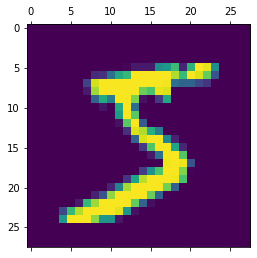

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

2023-03-02 03:42:59.650454: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-02 03:42:59.650484: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-03-02 03:42:59.651029: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2722 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1247 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0879 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0670 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0546 - accuracy: 0.9832


In [12]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [13]:
model.get_weights()

[array([[ 0.06683302, -0.03086295,  0.02890759, ...,  0.01406442,
          0.07767461,  0.01893619],
        [-0.01117591, -0.01574432,  0.03184751, ...,  0.02467813,
         -0.0778423 , -0.04000577],
        [-0.03867454,  0.04023566, -0.04400177, ..., -0.04496815,
         -0.02980107, -0.00230784],
        ...,
        [-0.01624385, -0.04138638, -0.02752268, ...,  0.00657269,
          0.0085503 , -0.02797749],
        [-0.04149339,  0.04760449, -0.0416675 , ..., -0.0234024 ,
         -0.0444087 ,  0.02889847],
        [ 0.05322529,  0.05955327,  0.05637455, ...,  0.03334821,
          0.03758132, -0.01176586]], dtype=float32),
 array([-0.06838273,  0.17515878,  0.05798578,  0.06896637,  0.05566559,
         0.01345446,  0.21770483,  0.11672615,  0.04277654,  0.20778151,
         0.10402143,  0.03257954,  0.1507949 ,  0.0533148 , -0.0862962 ,
         0.03558668, -0.01537018, -0.05111796,  0.10128336,  0.1657435 ,
         0.06838161,  0.04855727,  0.05821921, -0.02393137,  0.094

In [14]:


tf.keras.backend.clear_session()
